<a href="https://colab.research.google.com/github/jevabrir/Progs-JB/blob/main/Interpolaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Código para generar Interpolación Lineal**

**Descripción del programa:**  

Este código genera un mapa de interpolación espacial a partir de datos muestreados en coordenadas **x**, y **y** valores asociados **z** (nivel de contamiante), utilizando Python y sus bibliotecas científicas.   

Emplea una interpolación lineal para estimar valores sobre una malla regular, y visualiza el resultado mediante un mapa de isolíneas (contour map).

El programa realiza las siguientes tareas:

*   **Interpolación de datos:** Usa scipy.interpolate.griddata para generar una superficie continua a partir de los puntos discretos muestreados.

*   **Visualización:** Crea un mapa de color continuo (contourf) para representar los valores interpolados.

*   **Dibuja isolíneas** en color negro cada 0.5 unidades (contour), etiquetadas con sus valores.

*   **Muestra los puntos de muestreo** con marcadores blancos con borde negro.

*   **Añade etiquetas** numéricas sobre cada punto muestreado.

*   **Exportación del gráfico:** Guarda la visualización como una imagen PNG con fondo transparente y alta resolución (300 dpi).  


Este tipo de representación es útil para visualizar distribuciones espaciales, como concentraciones de contaminantes, temperatura, humedad o cualquier otra variable continua en una región geográfica

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
#from PIL import Image

In [ ]:
# 1. Leer archivo .CSV que contiene la información
df = pd.read_csv("datos_interpolacion_utm.csv")
df.head(5)

,Punto,CoorX,CoorY,NivelCont
0,A,104.0,80.5,98.0
1,B,106.0,82.5,92.0
2,D,103.0,78.5,95.5
3,F,100.0,79.0,91.0
4,G,105.0,77.5,91.0


In [ ]:
x = df["CoorX"].values
y = df["CoorY"].values
z = df["NivelCont"].values

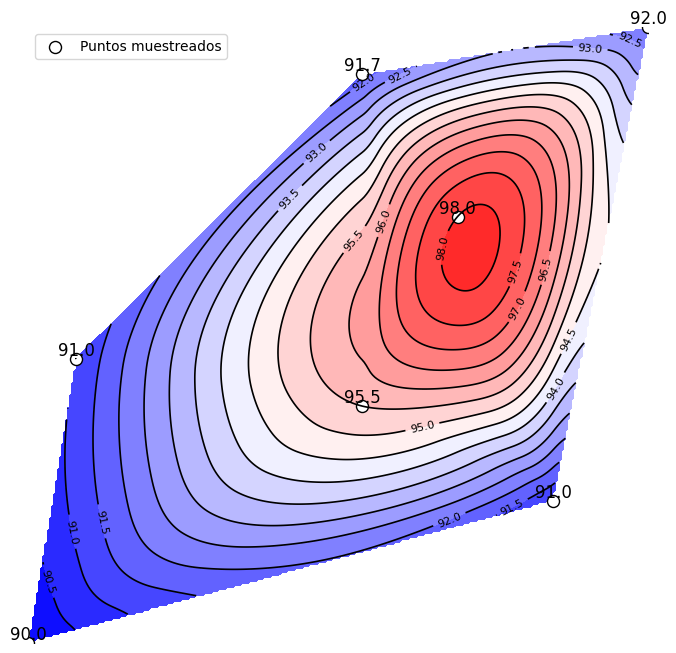

In [ ]:
import numpy as np

# Crear imagen del mapa
fig, ax = plt.subplots(figsize=(8, 8))

# Definir niveles con paso de 0.5 unidades
min_z = np.floor(np.nanmin(zi))
max_z = np.ceil(np.nanmax(zi))
levels = np.arange(min_z, max_z + 0.5, 0.5)

# Mapa de colores
contourf = ax.contourf(xi, yi, zi, levels=levels, cmap='bwr')

#se puede cambiar el cmap por:
#    'coolwarm' – azul claro → blanco → rojo claro
#    'bwr' – azul → blanco → rojo
#    'seismic' – azul fuerte → blanco → rojo fuerte
#    'PiYG' – rosa → verde
#    'RdBu' – rojo → azul

# Isolíneas negras
contour_lines = ax.contour(xi, yi, zi, levels=levels, colors='black', linewidths=1.2)
ax.clabel(contour_lines, fmt="%.1f", fontsize=8, colors='black')  # Etiquetas en las líneas

# Puntos muestreados
plt.scatter(x, y, c='white', edgecolor='black', s=75, label='Puntos muestreados')
for i in range(len(x)):
    ax.text(x[i], y[i], f"{z[i]:.1f}", fontsize=12, ha='center', va='bottom', color='black')

plt.axis('off')
plt.legend(loc='upper left')
img_path = "isolineas.png"
plt.savefig(img_path, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)
# plt.close()


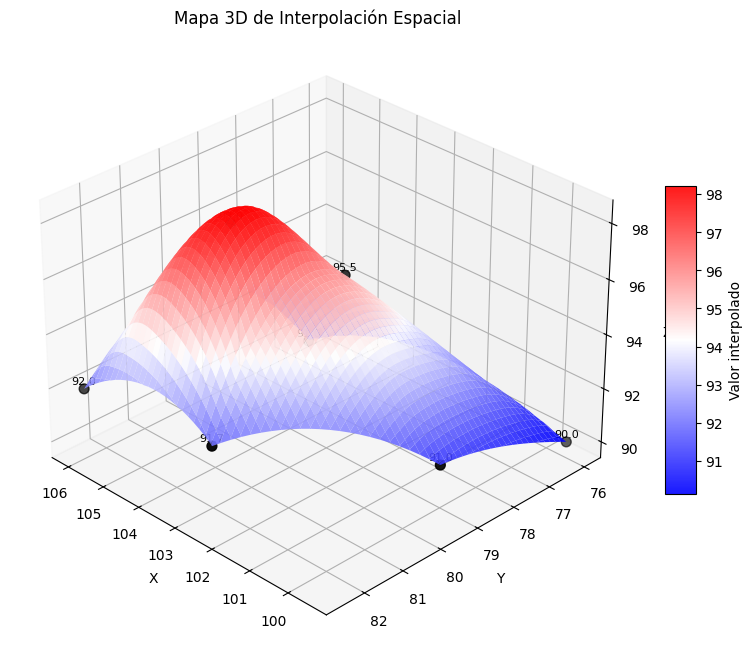

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # Importar proyección 3D

# === 4. Crear gráfico 3D ===
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie interpolada en 3D
surf = ax.plot_surface(xi, yi, zi, cmap='bwr', edgecolor='none', alpha=0.9)

# Puntos muestreados en 3D
ax.scatter(x, y, z, color='black', s=50, label='Puntos muestreados')

# Etiquetas sobre los puntos
for i in range(len(x)):
    ax.text(x[i], y[i], z[i] + 0.1, f"{z[i]:.1f}", fontsize=8, ha='center', va='bottom', color='black')

# Etiquetas de ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Personalización visual
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Valor interpolado')
ax.view_init(elev=30, azim=135)  # Ángulo de vista (elevación y azimut)
ax.set_title('Mapa 3D de Interpolación Espacial')

# Guardar imagen
fig.savefig("mapa_3d.png", dpi=300, bbox_inches='tight')
# plt.close()
